In [1]:
library(performance)
library(ggplot2)
library(cowplot)
library(olsrr)
options(width=160, repr.plot.width=11, repr.plot.height=7)   


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




# Regresní analýza

## Lineární regresní model

Lineární regresní model je nejjednodušším modelem popisujícím vztah mezi 
- **regresorem** - nezávislou (vysvětlující) proměnnou
- **regresandem** - závislou (vysvětlovanou) proměnnou

Buď $Y_i$, $i=1,\ldots, n$ náhodné veličiny popisující pozorování (měření), jež mají vysvětlovat reálné vektory $\mathbf{x}_i = [x_{i1}, \ldots, x_{ik}]^\intercal$, $n>k$. Lineární regresní model je model ve tvaru

$$
Y_i = \beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik} + \varepsilon_{i}, \qquad \text{iid.}\ \ \varepsilon_t \sim \mathcal{N}(0, \sigma^2),
$$

kde $\beta_0, \ldots, \beta_k \in \mathbb{R}$ jsou neznámé **regresní koeficienty** a spolu s rozptylem $\sigma^2>0$ tvoří neznámé parametry modelu. **Šum** $\varepsilon_i$ jsou nezávislé stejně rozdělené náhodné veličiny, porušující kauzalitu mezi $Y_i$ a $x_i$. Normalita $\varepsilon_i$ není bezpodmínečně nutná, vede ovšem na dobré vlastnosti modelu z hlediska statistiky, proto ji zde budeme předpokládat.

Typickým příkladem modelu je
- obecná přímka: $Y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$
- kvadratická regrese: $Y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \varepsilon_i$
- polynomická regrese $k$-tého stupně: $Y_i = \beta_0 + \beta_1 x_i + \ldots + \beta_k x_i^k + \varepsilon_i$
- hyperbolická regrese: $Y_i = \beta_0 + \beta_1 / x_i + \varepsilon_i$

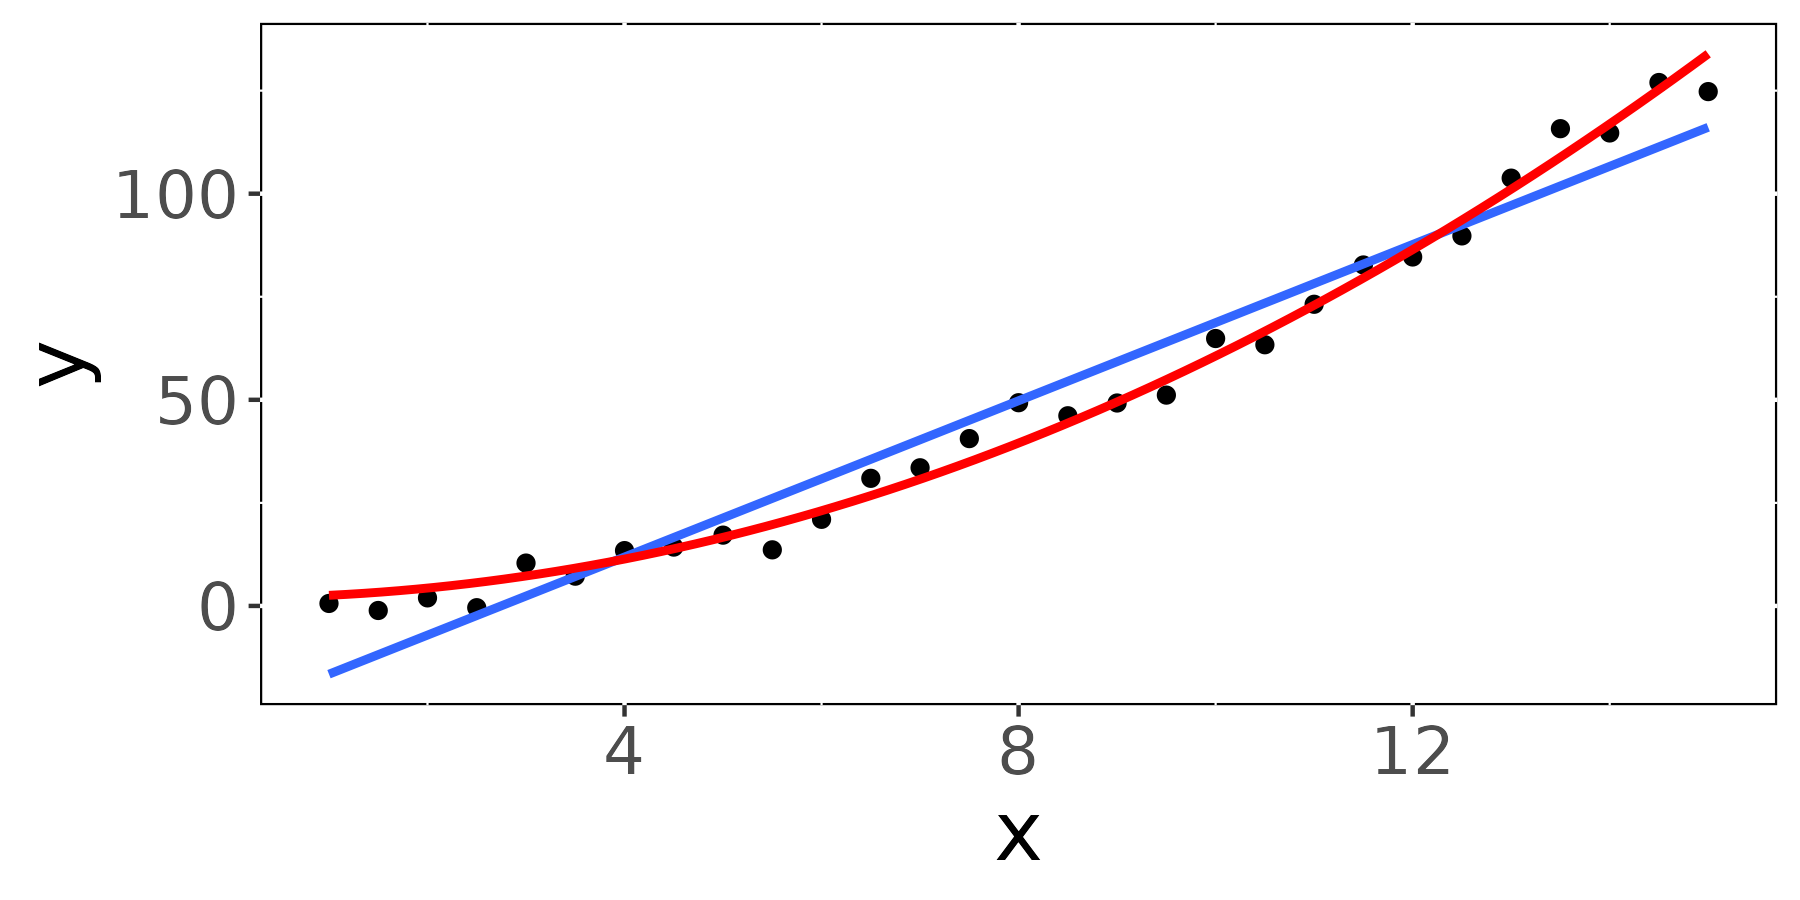

Výše uvedený regresní model se často zapisuje v maticovém tvaru

$$
\mathbf{Y} = \mathbf{X}{\beta} + {\varepsilon}.
$$

Ten odpovídá vztahu

$$
\begin{bmatrix}
Y_1 \\ \vdots \\ Y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & \ldots & x_{1k} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & \ldots & x_{nk} \\
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ \vdots \\ \beta_k
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_1 \\ \vdots \\ \varepsilon_n
\end{bmatrix}.
$$

Z předpokladů zjevně plyne 
$$
\begin{aligned}
\operatorname{E}\mathbf{Y} &= \mathbf{X}{\beta}, \\
\operatorname{cov}(\mathbf{Y}) &= \sigma^2 \mathbf{I}.
\end{aligned}
$$

Buďte dány $Y_1, \ldots, Y_n$. Označme jejich predikce z regresního modelu jako $\hat{Y}_1, \ldots, \hat{Y}_n$. Dále buď $\bar{Y}$ průměr $Y_1,\ldots, Y_n$. Potom definujeme

- $S_T$ - celkový součet čtverců (*srov. s výběrovou variancí*!)

$$
S_T = \sum_{i=1}^{n} (Y_i - \bar{Y})^2,
$$

- $S_e$ - reziduální součet čtverců

$$
S_e = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2.
$$

Nakreslete si příklad!

> **Věta:** Odhad vektoru regresních koeficientů $\hat{\beta} = [\hat\beta_0,\ldots,\hat\beta_k]^\intercal$ metodou nejmenších čtverců (MNČ) má tvar
>
>$$
\hat{{\beta}} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{Y}.
$$
>
> **Důkaz:** Odhad MNČ říká, že výraz $(\mathbf{Y} - \mathbf{X}\beta)^\intercal(\mathbf{Y} - \mathbf{X}\beta)$ jako funkce $\beta$ má být minimální. Uvažujme $k<n$ a lineární nezávislost sloupců $\mathbf{X}$. Potom hodnost $h(\mathbf{X}) =k$ a tedy $\mathbf{X}^\intercal \mathbf{X}$ je regulární matice. Je zřejmé, že i když je $\mathbf{Y} = \mathbf{X}\hat{\beta}$ nekonzistentní, soustava normálních rovnic $\mathbf{X}^\intercal \mathbf{Y} = \mathbf{X}^\intercal \mathbf{X} \beta$ konzistentní je a má právě jedno řešení. Dostáváme tedy
>
>$$
\begin{aligned}
(\mathbf{Y} - \mathbf{X}\beta)^\intercal (\mathbf{Y} - \mathbf{X}\beta) 
&= [(\mathbf{Y} - \mathbf{X}\hat{\beta}) + (\mathbf{X}\hat{\beta} - \mathbf{X}{\beta})]^\intercal
[(\mathbf{Y} - \mathbf{X}\hat{\beta}) + (\mathbf{X}\hat{\beta} - \mathbf{X}{\beta})] \\
&= (\mathbf{Y} - \mathbf{X}\hat\beta)^\intercal (\mathbf{Y} - \mathbf{X}\hat\beta) 
+ (\hat\beta - \beta)^\intercal \mathbf{X}^\intercal \mathbf{X} (\hat\beta - \beta) \\
&\geq (\mathbf{Y} - \mathbf{X}\hat\beta)^\intercal (\mathbf{Y} - \mathbf{X}\hat\beta).
\end{aligned}
$$
>
> Vzhledem k regularitě $\mathbf{X}^\intercal \mathbf{X}$ je rovnosti dosaženo při $\hat{\beta}=\beta$.

Označme **predikce** $\mathbf{\hat{Y}} = \mathbf{X}\hat{\beta}$.

> **Věta:** Nestranným odhadem variance šumu $\sigma^2$ je **reziduální rozptyl**
>
>$$
s^2 = \frac{S_e}{n-k-1} = \frac{1}{n-k-1} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2.
$$
>
> **Důkaz:** viz literatura.

> **Věta:** Za předpokladu normality $\varepsilon_i$ platí $\hat{\beta} \sim N\left(\beta, \sigma^2(\mathbf{X}^\intercal \mathbf{X})^{-1}\right)$.
>
> **Důkaz** - Víme, že $\mathbf{Y} \sim N(\mathbf{X}{\beta}, \sigma^2)$. Odhad $\hat{\beta}$ vzniká lineární transformací $\mathbf{Y}$, je tedy i on normálně rozdělený. Označme pro jednoduchost $\mathbf{A}=(\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal$. Potom
>
>$$
\begin{aligned}
\operatorname{E}{\hat\beta} &= \operatorname{E}\left[\mathbf{A}\mathbf{Y}\right] = \mathbf{A} \operatorname{E}\left[\mathbf{Y}\right] = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{X}{\beta} = {\beta},\\
\operatorname{var}{{\hat\beta}} &= 
\operatorname{var}\left(\mathbf{A}\mathbf{Y}\right) = \mathbf{A}\operatorname{var}(\mathbf{Y})\mathbf{A}^\intercal = \mathbf{A}(\sigma^2 \mathbf{I})\mathbf{A}^\intercal = \sigma^2 (\mathbf{X}^\intercal \mathbf{X})^{-1}.
\end{aligned}
$$

### Predikce a pásy spolehlivosti

V lineární regresi nás zpravidla zajímá **predikce** pro daný regresní vektor $\tilde{\mathbf{x}} = [1, \tilde{x}_1, \ldots, \tilde{x}_{k}]^\intercal$. Bez důkazu si uveďme, že **bodová predikce** $\hat{y}$ má vlastnosti

$$
\begin{aligned}
\operatorname{E}[\hat{y}] = \operatorname{E}[\color{red}{\tilde{\mathbf{x}}^\intercal\hat{{\beta}}}] &= \tilde{\mathbf{x}}^\intercal{\beta},\\
\operatorname{var}(\hat{y}) = \operatorname{var}(\color{red}{\tilde{\mathbf{x}}^\intercal\hat{{\beta}}}) &= \tilde{\mathbf{x}}^\intercal(\operatorname{var} \hat{{\beta}})\tilde{\mathbf{x}} = 
\color{green}{\sigma^2 \tilde{\mathbf{x}}^\intercal (\mathbf{X}^\intercal\mathbf{X})^{-1}
\tilde{\mathbf{x}}},
\end{aligned}
$$

tj. *predikujeme s využitím bodového odhadu* regresních koeficientů. Zajímat by nás mohl i interval spolehlivosti pro naši predikci. Ten vychází ze statistiky (*rozmyslete!*)

$$
T = \frac{\color{red}{\tilde{\mathbf{x}}^\intercal \hat{{\beta}}} - \tilde{\mathbf{x}}^\intercal {\beta}}
         {\sqrt{\color{magenta}{s^2}\color{green}{\tilde{\mathbf{x}}^\intercal(\mathbf{X}^\intercal \mathbf{X})^{-1} \tilde{\mathbf{x}}}}} \sim \color{blue}{t_{n-k-1}}.
$$

Přeuspořádáním statistiky a použitím příslušné kritické hodnoty $t_{n-k-1}(\frac{\alpha}{2})$ dostaneme oboustranný interval spolehlivosti pro konkrétní hodnotu odhadu při spojitě se měnícím regresoru $\tilde{\mathbf{x}}$:

$$
IS(\tilde{\mathbf{x}}^\intercal {\beta}) = 
\left(\color{red}{\tilde{\mathbf{x}}^\intercal \hat{{\beta}}} - \color{blue}{t_{n-k-1}\left(\frac{\alpha}{2}\right)}\color{green}{\sqrt{\color{magenta}{s^2} \tilde{\mathbf{x}}^\intercal
(\mathbf{X}^\intercal\mathbf{X})^{-1}
\tilde{\mathbf{x}}}},\ \ 
\color{red}{\tilde{\mathbf{x}}^\intercal \hat{{\beta}}} + \color{blue}{t_{n-k-1}\left(\frac{\alpha}{2}\right)}\color{green}{\sqrt{\color{magenta}{s^2} \tilde{\mathbf{x}}^\intercal
(\mathbf{X}^\intercal\mathbf{X})^{-1}
\tilde{\mathbf{x}}}}
\right).
$$

Vzniklý **pás spolehlivosti kolem regresního modelu** (např. přímky) je tvořen dvěma větvemi hyperboly. Je (pochopitelně) nejužší v místě průměru $\mathbf{x}$, se vzdáleností od něj monotónně roste. Nelze jej ovšem interpretovat tak, že na dané hladině významnosti pokrývá celý teoretický model, např. přímku. Naopak říká, kde lze měření očekávat *při* konkrétním modelu (např. přímce) dané konkrétním odhadem. Naproti tomu **pás spolehlivosti pro regresní model** (např. přímku) už pracuje se všemi hypotetickými modely (např. přímkami). Tato problematika je ale dalece za intencemi předmětu.

A ještě dodatek: zejména anglicky se termín "confidence interval" preferuje spíše pro odhady parametrů, zatímco pro predikce je preferován pojem "prediction interval". Často se to porušuje, k [nelibosti](https://robjhyndman.com/hyndsight/intervals/) mnohých statistiků.

---

## Metoda umělých (faktorových) proměnných

Poměrně často lze data na základě nějaké informace rozdělit do podskupin, jež mohou být relativně rozdílné. Taková situace typicky nastává při přítomnosti faktorů, např. pohlaví, věková kategorie apod. Potom se zavádí umělé proměnné. Uvažujme modelování závislosti hmotnosti na výše postavy s informací o tom, zda se jedná o muže či ženu. Potom zavádíme umělé proměnné:
- $Y_i$ - hmotnost osoby
- $x_i$ - výška
- $z_i$ - indikátor definovaný jako
$$
z_i =
\begin{cases}
0 & \text{muž},\\
1 & \text{žena}.
\end{cases}
$$

Můžeme pak zavést např. model regresní přímky v podobě (*nakreslete!*)
- $\color{blue}{Y_i = \beta_0 + \beta_1 x_i + \beta_2 z_i + \varepsilon_i}$
   - *pohlavím je ovlivněn pouze parametr $\beta_0$. Významný závěr testu $H_0: \beta_2=0$ vypovídá o rozdílnosti posunutí $\beta_0$ pro muže a ženy.*
- $\color{blue}{Y_i = \beta_0 + \beta_1 x_i + \beta_2 z_i x_i + \varepsilon_i}$
   - *pohlavím je ovlivněn pouze parametr $\beta_1$. Významný závěr testu $H_0: \beta_2=0$ vypovídá o rozdílnosti směrnice $\beta_1$ pro muže a ženy.*
- $\color{blue}{Y_i = \beta_0 + \beta_1 x_i + \beta_2 z_i + \beta_3 z_i x_i+ \varepsilon_i}$
   - *pohlaví ovlivňuje současně posunutí $\beta_0$ i směrnici $\beta_1$. Významné testy o $\beta_2$ a/nebo $\beta_3$ indikují vhodnost jednodušších modelů.*
   
Ve druhém a třetím případě mluvíme o **interakci** mezi pohlavím a výškou postavy.

---

## Analýza lineárního regresního modelu

### Koeficient determinace

> **Definice:** [Koeficient determinace](https://en.wikipedia.org/wiki/Coefficient_of_determination) je definován vztahem
>
>$$
R^2 = 1 - \frac{S_e}{S_T}.
$$

Podíl $\frac{S_e}{S_T}$ kvantifikuje relativní rozdíl mezi dvěma modely:
1. *průměrový model* pro všechna $i$ předpovídá $\hat{Y}_i = \bar{Y}$, má chybu $S_T$,
2. náš *konkrétní model* má chybu $S_e$. Nejlepší možný model může dosáhnout $S_e = 0$ a tedy $R^2=1$. Nejhůře bude shodný s modelem průměrovým, $S_e=S_t$ a $R^2=0$. Nakreslete si příklad!

$R^2$ má tu slabinu, že s přidáváním nových regresorů neklesne, neboť komplexnější model bude predikovat přinejhorším stejně, jako původní. V praxi to některé "modeláře" vede k absurdně složitým modelům. Ve snaze tuto vlastnost $R^2$ nějak postihnout zavádíme [**adjustovaný koeficient determinace $R_{\text{adj}}^2$**](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

$$
R_{\text{adj}}^2 = 1 - \frac{\frac{S_e}{n-k-1}}{\frac{S_T}{n-1}}.
$$

$n-k-1$ odpovídá počtu stupňů volnosti regresního modelu a $n-1$ počtu stupňů volnosti průměrového modelu, kde chybí oněch $k$ koeficientů (a zbývá jen $\beta_0$ v roli průměru).

### Testy koeficientů

#### t testy jednotlivých regresních koeficientů
- $H_0$: $\beta_i = 0$
- $H_A$: $\beta_i \ne 0$

Test ověřuje, zda $\mathbf{Y}$ vůbec závisí na $i$-tém sloupci matice $\mathbf{X}$ (tj. na $i$-tém regresoru). Je založen na statistice

$$
T_i = \frac{b_i}{\sqrt{s^2 \xi_{ii}}} \sim t_{n-k},
$$

kde $\xi_{ii}$ je $i$-tý diagonální prvek matice $(\mathbf{X}^\intercal \mathbf{X})^{-1}$. Porovnejte s $\operatorname{var}\hat{{\beta}}$ výše a vzpomeňte na t testy v BI-PST a BI-PRS. Tato statistika nám umožňuje testovat výše uvedené hypotézy i konstruovat příslušné intervaly spolehlivosti pro jednotlivá $\beta_i$. Vychází-li test pro příslušný parametr významně, je na místě vyšetřit vhodnost příslušného regresoru v modelu.

#### F test nezávislosti regresandu a regresoru

Tento test, zvaný též **test významnosti modelu**, se zabývá hypotézami

- $H_0$: $\beta_1 = \ldots = \beta_k = 0$
- $H_A$: neplatí $H_0$

Test je postaven nad Fisherovým-Snedecorovým rozdělením. Jeho odvození vynecháme.

### Analýza reziduí

Zajímá nás zejména:
- průměr reziduí - ideálně bychom očekávali hodnotu okolo nuly
- normalita reziduí - testujeme pomocí testů normality a analýzou Q-Q (kvantilového) grafu
- nekorelovanost reziduí - zejména v časových řadách zjišťujeme, zda rezidua jsou vzájemně nekorelovaná. Populárními testy jsou zejména [Durbinův-Watsonův test](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic), [Ljungové-Boxův test](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) a [Breuschův-Godfreyúv test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Godfrey_test). Zjednodušeně řečeno, všechny tyto testy mají $\mathbf{H_0:}$ **rezidua jsou nekorelovaná**.
- homoskedasticita reziduí, tj. konstantní rozptyl reziduí. Opět nás zajímá typicky v případě časových řad. Oblíbeným testem je např. [Breuschův-Paganův test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_testhttps://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test) či [Goldfeldův-Quandtův test](https://en.wikipedia.org/wiki/Goldfeld%E2%80%93Quandt_test) s hypotézou $\mathbf{H_0:}$ **rezidua jsou homoskedastická**. V případě heteroskedasticity bychom uvažovali nad vhodnou transformací dat, která by [stabilizovala rozptyl](https://en.wikipedia.org/wiki/Data_transformation_(statistics)#Variance_stabilizing_transformations).
- [Cookova vzdálenost](https://en.wikipedia.org/wiki/Cook%27s_distance) měří míru vlivu jednotlivých pozorování na hodnoty odhadů. Umožňuje tak detekovat potenciální outliery, kterým bychom se následně měli více věnovat. Pro pozorování $Y_i$ je definována vztahem

$$
D_i = \frac{\sum_{j=1}^n (\hat{Y}_j - \hat{Y}_{j(i)})^2}{k \frac{S_e}{n-k}},
$$

kde $k$ je počet regresorů, $S_e$ je reziduální součet čtverců, $\hat{Y}_j$ je predikovaná hodnota $Y_j$ a $\hat{Y}_{j(i)}$ je predikovaná hodnota $Y_j$ vynechání pozorování $Y_j$ v průběhu odhadu. 

---

---

## Příklad

Na následujícím příkladu zkusíme nafitovat dva modely, porovnat jejich kvalitu a diskutovat o vlastnostech. Příklad je zejména diskusní záležitost pro přednášku, proto zde nebudeme detaily rozebírat.

**Vygenerujeme si data, na nichž budeme studovat výsledky regrese:**

In [2]:
set.seed(111)
x <- seq(1, 8, .25)
y <- x**2 + 10*rnorm(n=length(x))
df <- data.frame(x, y)

**Zkusíme dva modely:**
- $Y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$
- $Y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \varepsilon_i$

In [3]:
fit_lin <- lm(y~x, data=df)
tmp <- predict(fit_lin, interval="prediction")
df_lin <- cbind(df, tmp)

fit_quad <- lm(y~x+I(x^2), data=df)
tmp <- predict(fit_quad, interval="prediction")
df_quad <- cbind(df, tmp)

Warning message in predict.lm(fit_lin, interval = "prediction"):
“predictions on current data refer to _future_ responses
”
Warning message in predict.lm(fit_quad, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


**Porovnáme nejprve výsledky fitování obou modelů:**

In [4]:
summary(fit_lin)


Call:
lm(formula = y ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8768  -7.0920   0.3508   5.7519  29.7277 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.4865     4.8202   -5.08 2.46e-05 ***
x            10.5809     0.9714   10.89 2.20e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.94 on 27 degrees of freedom
Multiple R-squared:  0.8146,	Adjusted R-squared:  0.8078 
F-statistic: 118.7 on 1 and 27 DF,  p-value: 2.198e-11


In [5]:
summary(fit_quad)


Call:
lm(formula = y ~ x + I(x^2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.4793  -3.7769   0.5789   3.4090  22.4448 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -5.80094    8.77091  -0.661   0.5142  
x           -0.01252    4.38581  -0.003   0.9977  
I(x^2)       1.17704    0.47715   2.467   0.0205 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.04 on 26 degrees of freedom
Multiple R-squared:  0.8498,	Adjusted R-squared:  0.8382 
F-statistic: 73.54 on 2 and 26 DF,  p-value: 1.983e-11


- `Residuals` - důležité míry polohy reziduí (chyb regrese)
- `Coefficients` - `(Intercept)` je odhad $\hat{\beta}_0$, `wt` je odhad $\hat{\beta}_1$, jednotlivé sloupce mají následující význam: 
    - `Estimate` je hodnota bodového odhadu příslušného koeficientu,
    - `Std. Error` - směrodatná odchylka odhadu
    - `t value` - hodnota testové statistiky
    - `Pr(>|t|)` - p-hodnota testu o nulovosti příslušného koeficientu
- `Residual standard error` - $S_e/(n-k)$ kde $(n-k)$ je počet stupňů volnosti
- `Multiple R-squared` - koeficient determinace $R^2$
- `Adjusted R-squared` - adjustovaný koeficient determinace $R^2$
- `F-statistic` - F-statistika, stupně volnosti a p-hodnota testu, že všechny koeficienty jsou rovny nule.

**Dále vykreslíme data, odhadnutý model, intervaly spolehlivosti a predikční intervaly:**

Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


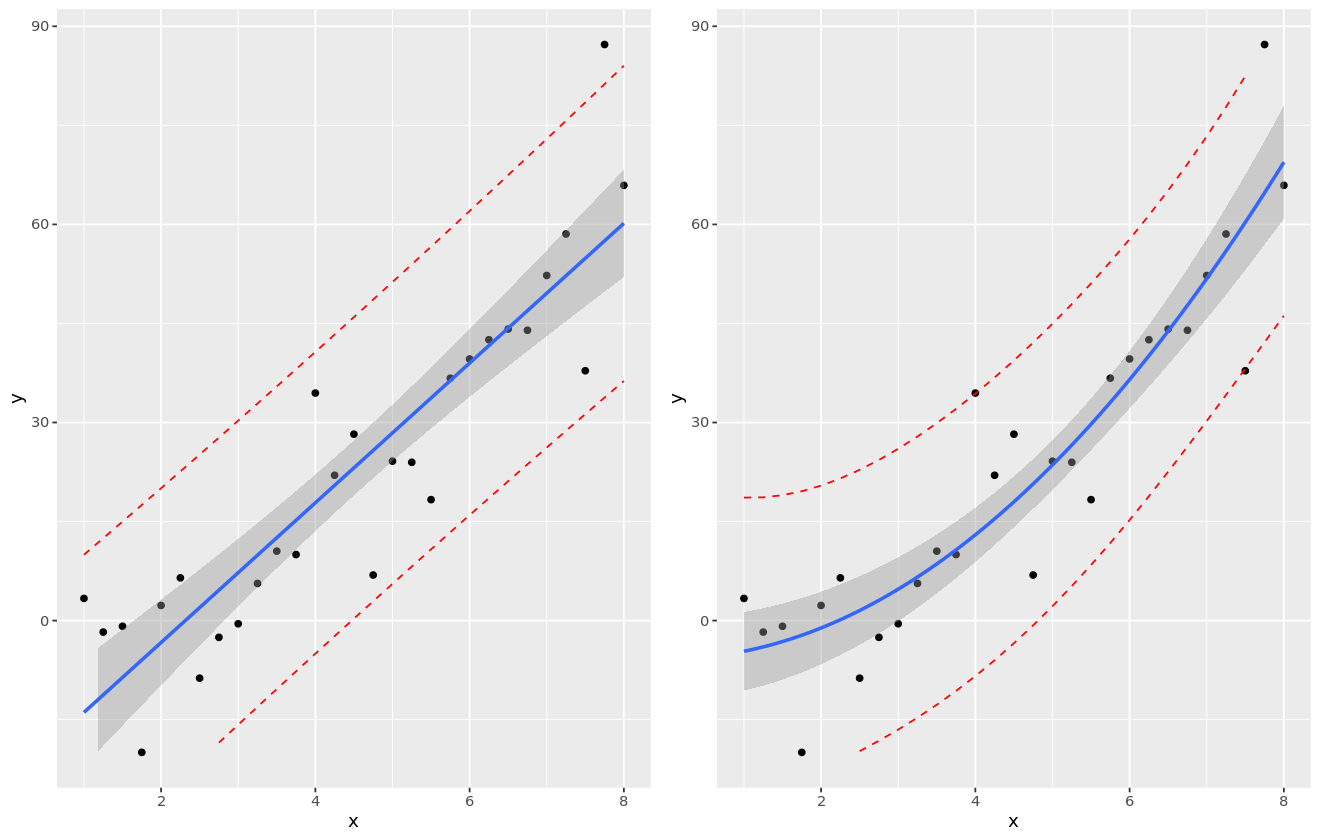

In [6]:
p1 <- ggplot(df_lin, aes(x, y)) +
        geom_point() +
        stat_smooth(method="lm", formula=y~x) +
        geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
        geom_line(aes(y=upr), color = "red", linetype = "dashed") +
        ylim(min(y), max(y))
p2 <- ggplot(df_quad, aes(x,y)) +
        geom_point() +
        stat_smooth(method="lm", formula=y~I(x^2)) +
        geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
        geom_line(aes(y=upr), color = "red", linetype = "dashed") +
        ylim(min(y), max(y))

plot_grid(p1, p2, ncol=2)

**Graf reziduí ukazuje, jak jsou rezidua rozložena. Ideálem je, aby byla symetricky okolo nuly a jejich střed byla přímka rovnoběžná s osou x. Systematický průběh reziduí indikuje nevhodnost modelu. Otestovat můžeme korelaci reziduí.**

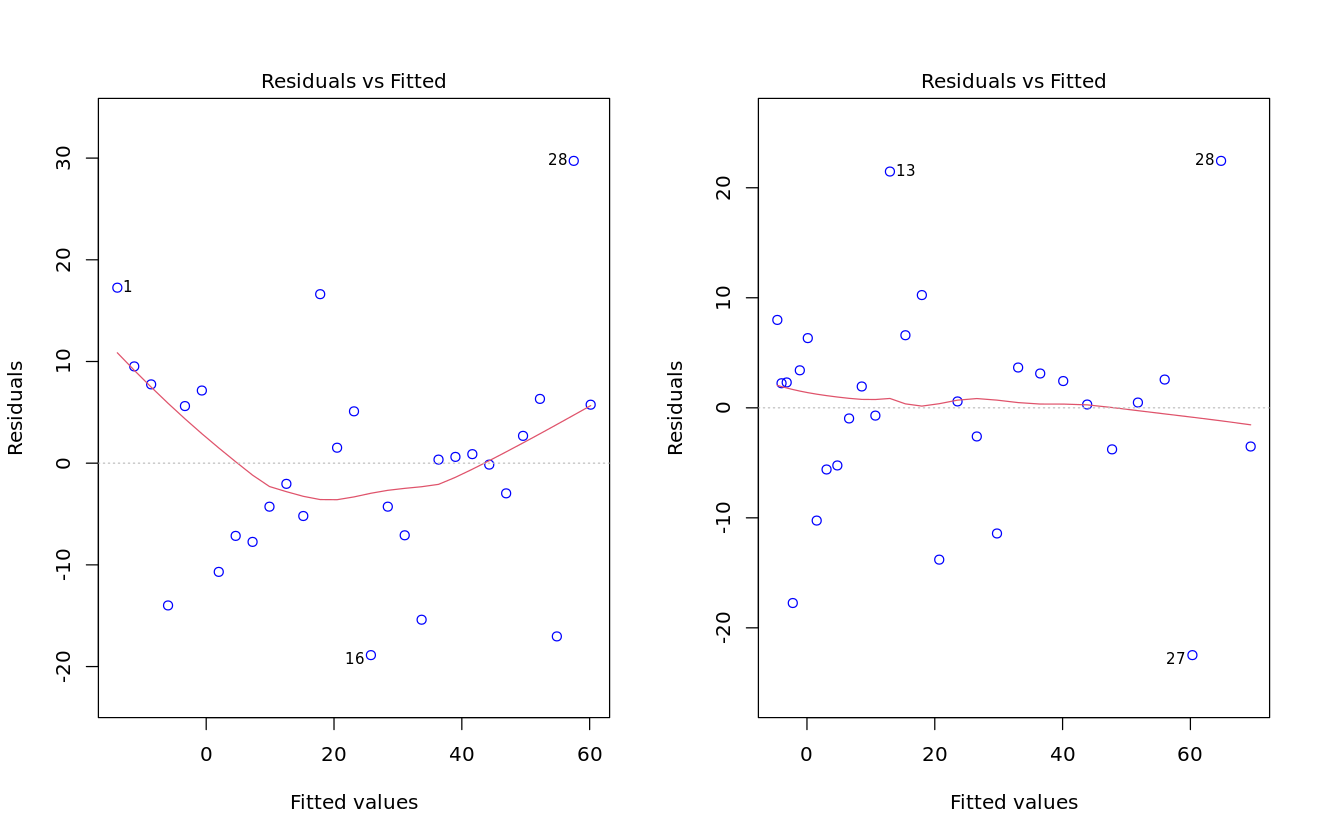

In [7]:
par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=1, col=c("blue"))
p2 <- plot(fit_quad, which=1, col=c("blue"))

In [8]:
ols_test_correlation(fit_lin)
ols_test_correlation(fit_quad)

[1] 0.9819929

[1] 0.9689254

**Normalita reziduí je ideálním jevem. Studujeme ji zejména pomocí Q-Q grafu, můžeme ji rovněž otestovat vhodným testem.**

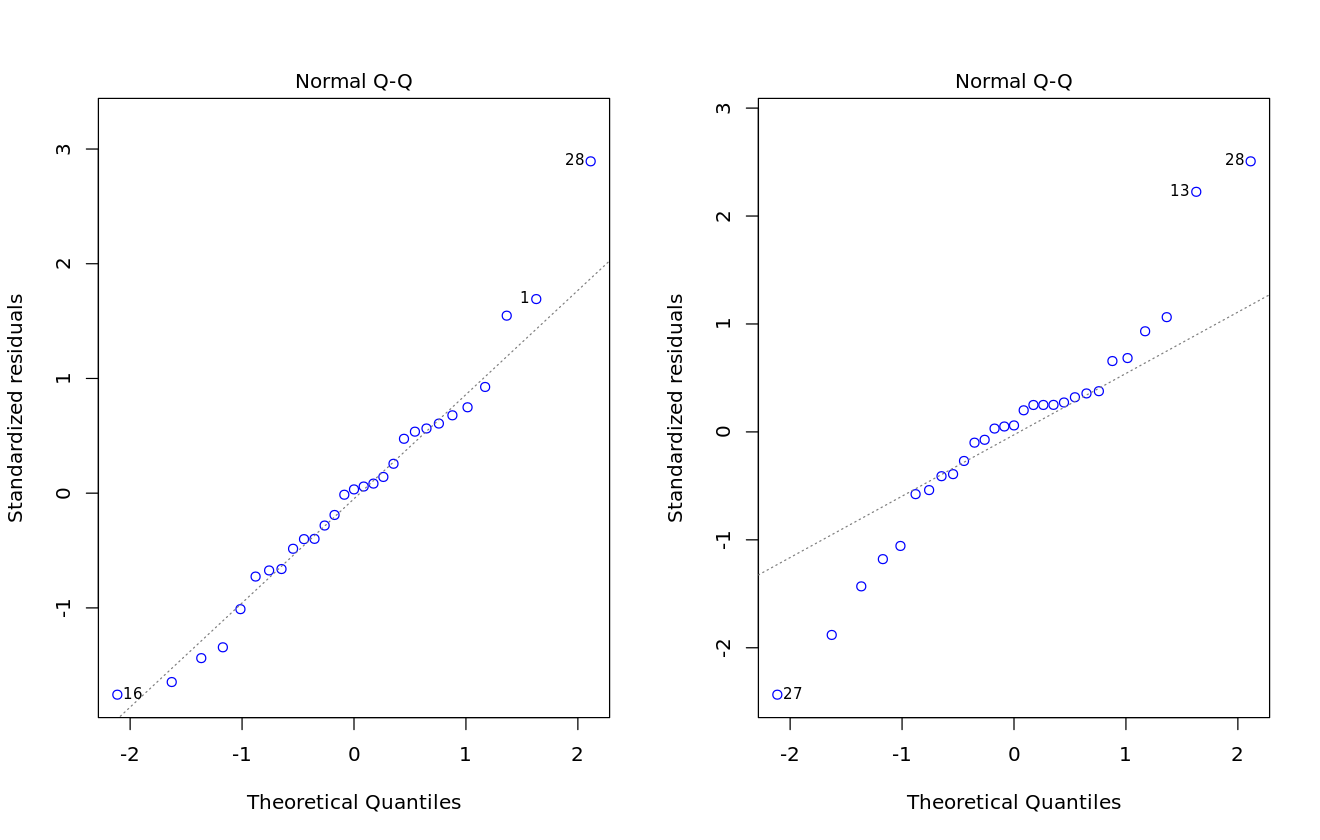

In [9]:
par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=2, col=c("blue"))
p2 <- plot(fit_quad, which=2, col=c("blue"))

In [10]:
ols_test_normality(fit_lin)
ols_test_normality(fit_quad)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9687         0.5262 
Kolmogorov-Smirnov        0.0975         0.9209 
Cramer-von Mises          1.9039         0.0000 
Anderson-Darling          0.2661         0.6654 
-----------------------------------------------

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9472         0.1548 
Kolmogorov-Smirnov        0.1456         0.5230 
Cramer-von Mises          1.7965         0.0000 
Anderson-Darling          0.7123         0.0562 
-----------------------------------------------

**[Homoskedastická nebo heteroskedastická](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) rezidua? Ideálem je, aby rezidua měla stejný rozptyl bez ohledu na svou velikost či polohu. Opět posuzujeme, zda jsou hodnoty rovnoměrně rozděleny nad a pod křivkou. Eventuálně použijeme vhodný test.**

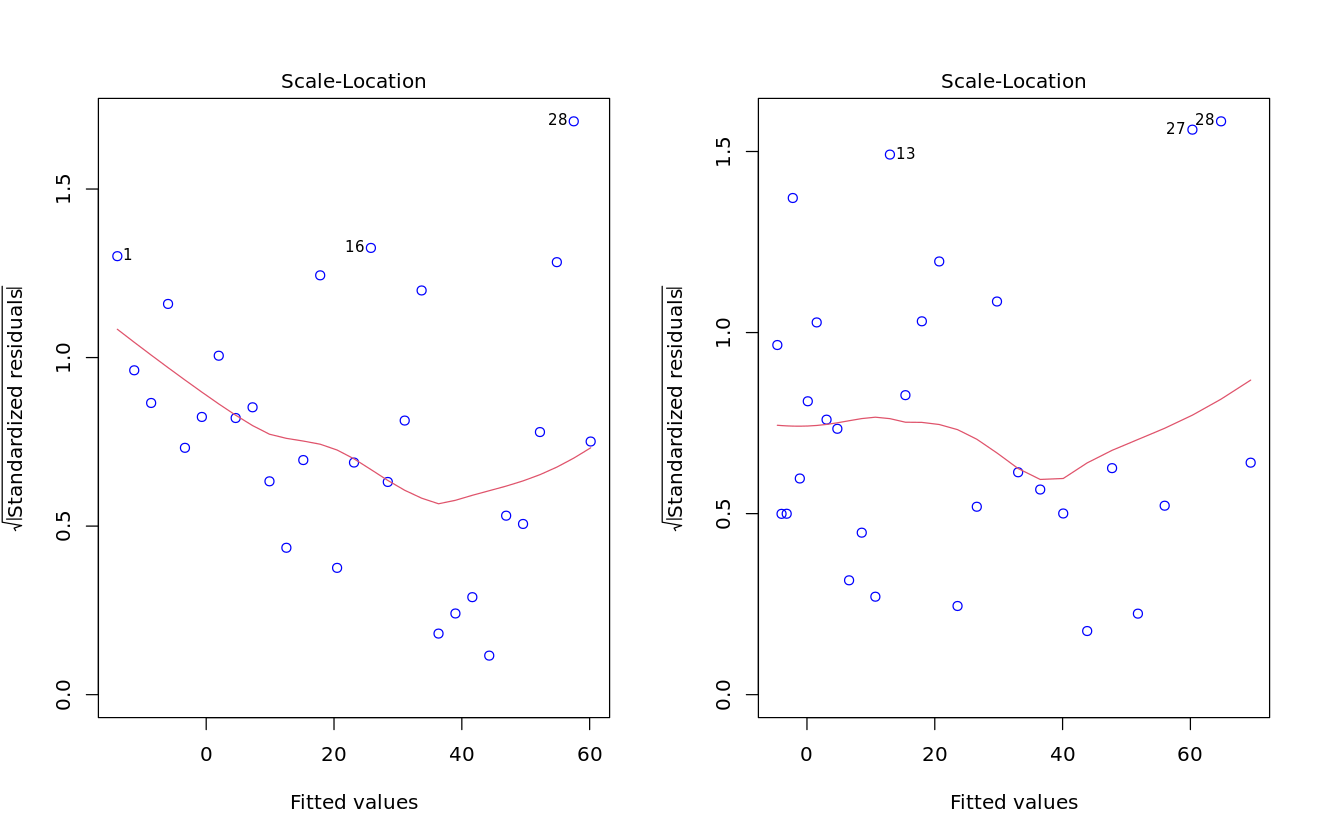

In [11]:
par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=3, col=c("blue"))
p2 <- plot(fit_quad, which=3, col=c("blue"))

In [12]:
ols_test_breusch_pagan(fit_lin)
cat('=======================================')
ols_test_breusch_pagan(fit_quad)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

            Data              
 -----------------------------
 Response : y 
 Variables: fitted values of y 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    0.7510546 
 Prob > Chi2   =    0.3861425 


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

            Data              
 -----------------------------
 Response : y 
 Variables: fitted values of y 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    1.903715 
 Prob > Chi2   =    0.1676631 

**Cookova vzdálenost:**

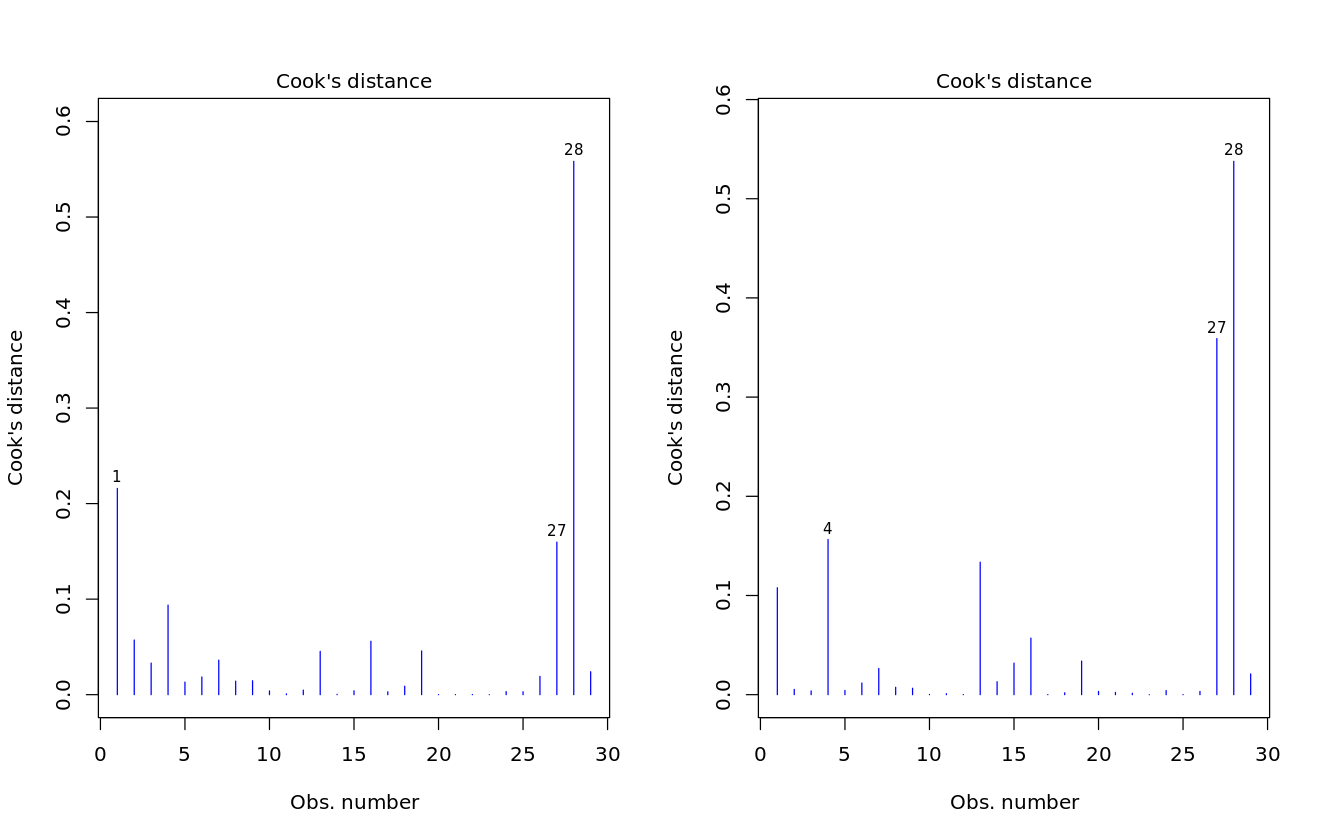

In [13]:
par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=4, col=c("blue"))
p2 <- plot(fit_quad, which=4, col=c("blue"))

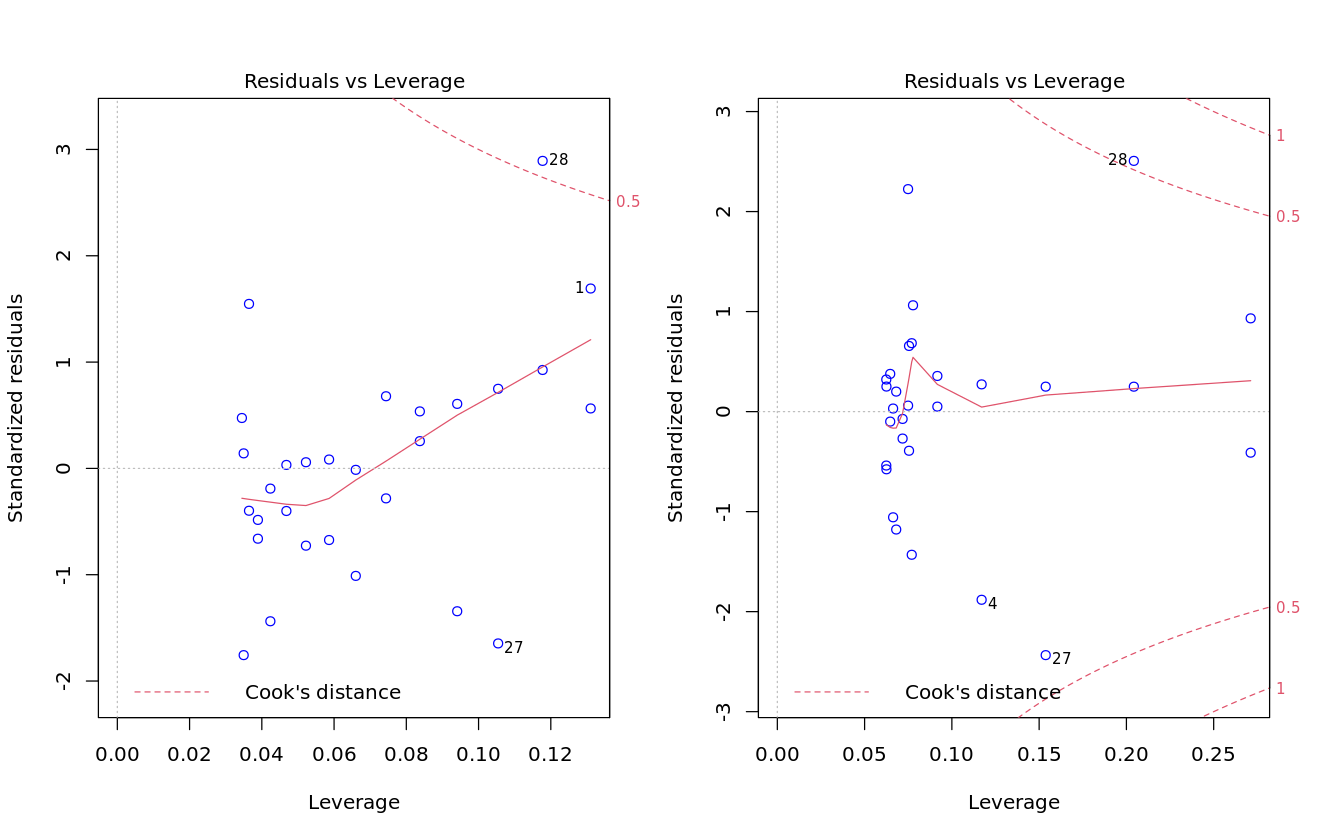

In [14]:
par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=5, col=c("blue"))
p2 <- plot(fit_quad, which=5, col=c("blue"))

**Způsobů, jak analyzovat výsledky v R je mnoho...**

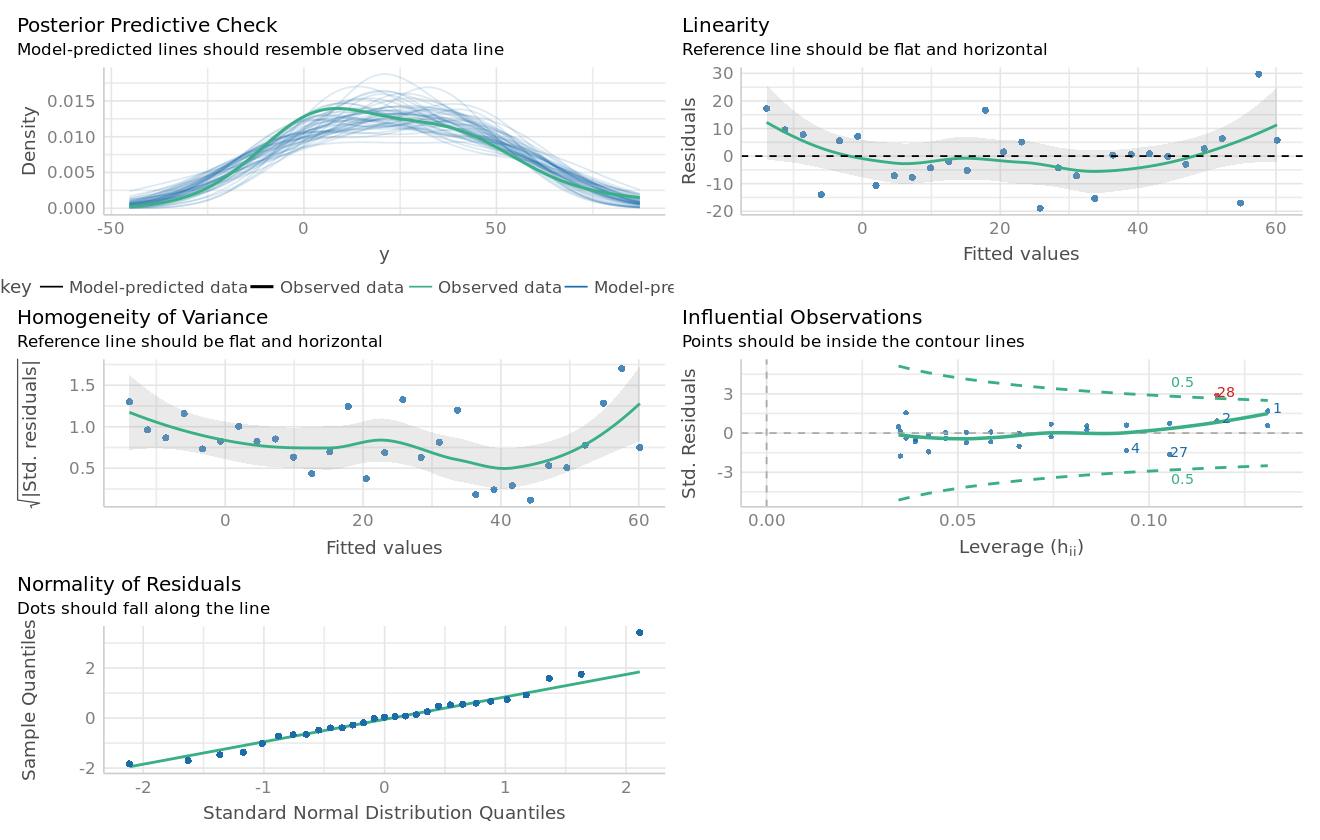

In [15]:
# performance
check_model(fit_lin)

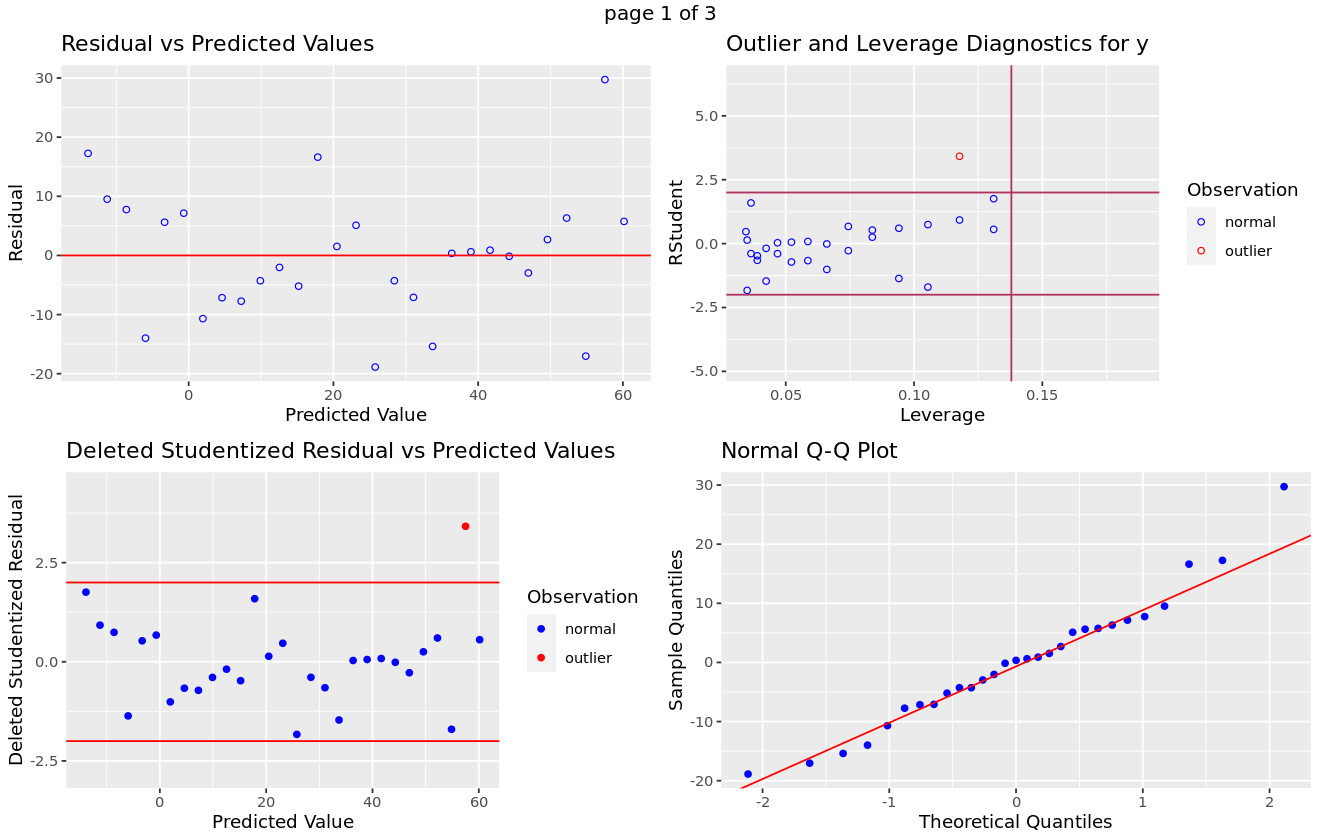

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


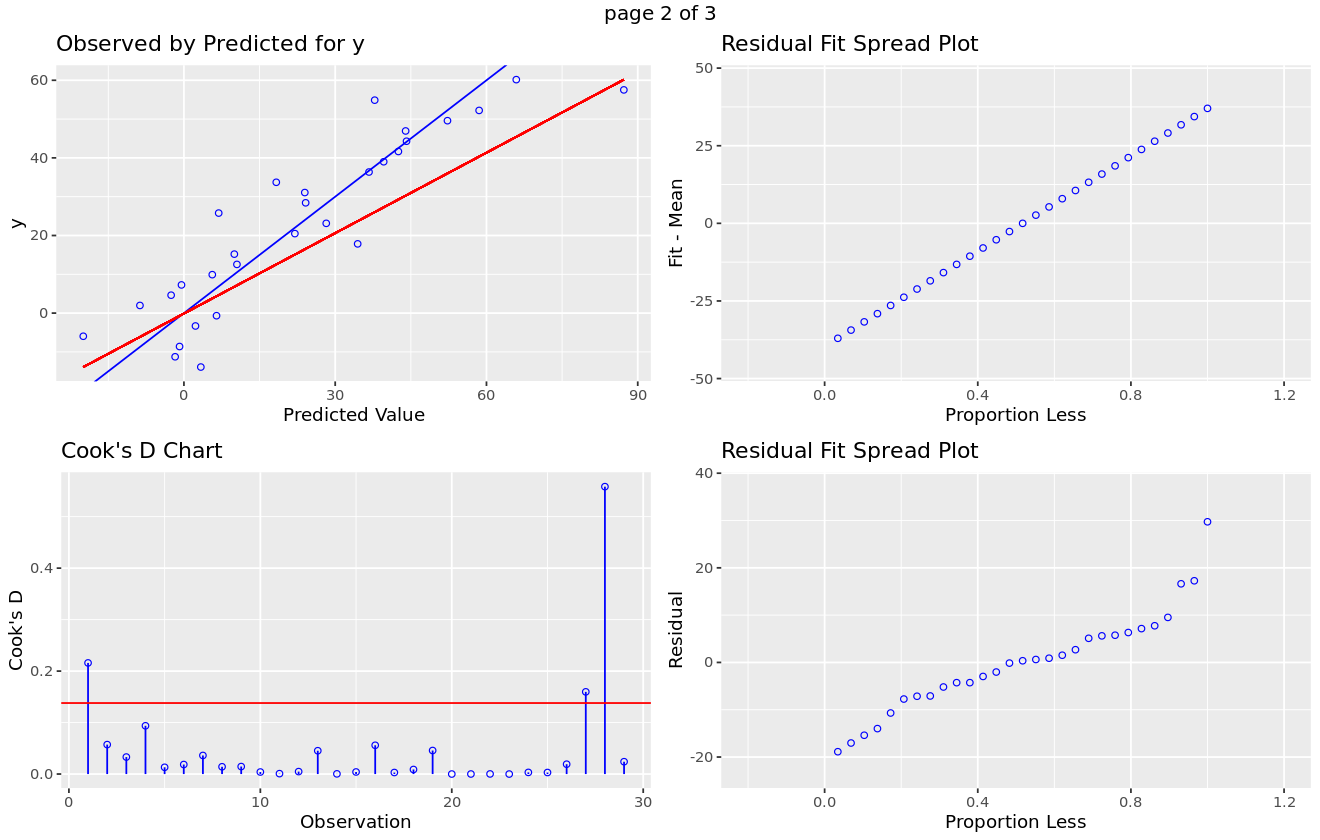

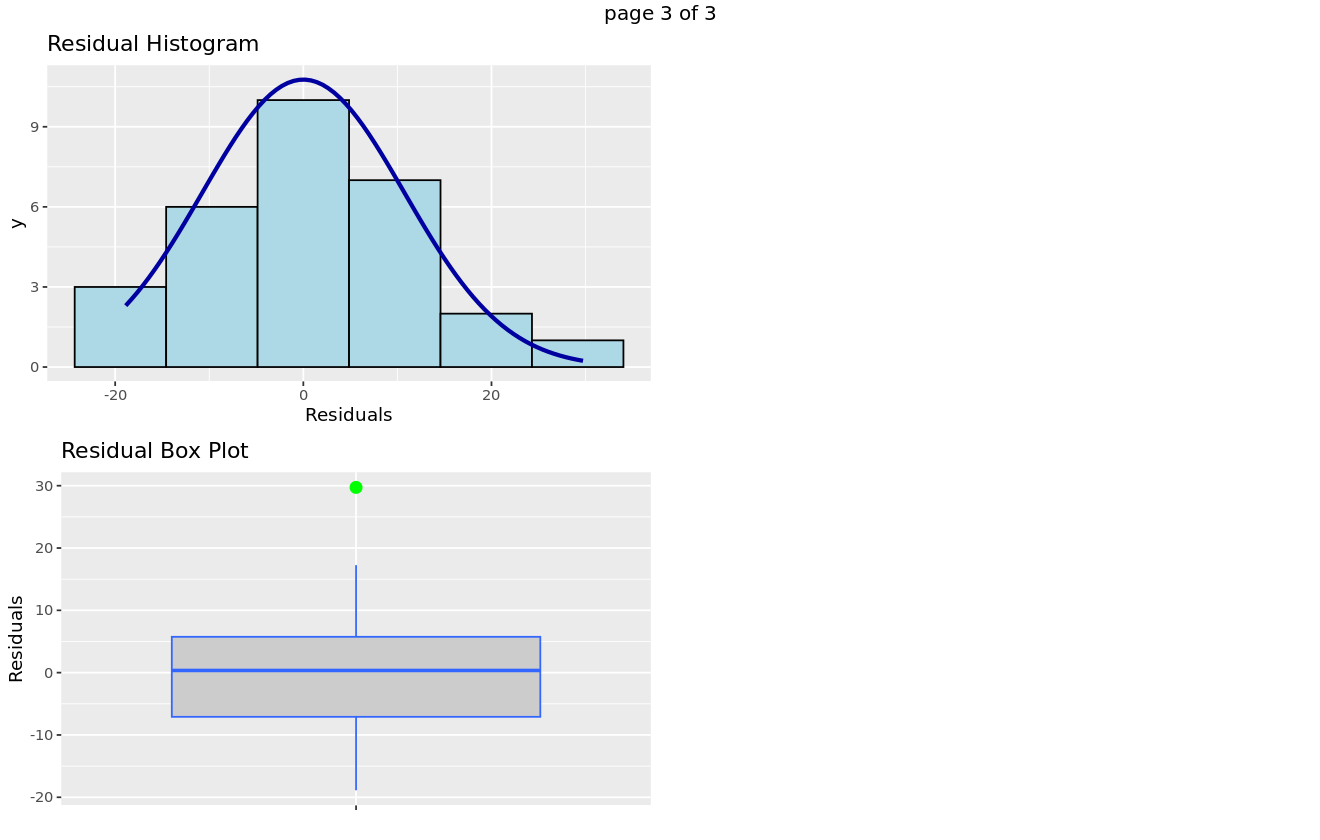

In [16]:
# ols_rr
ols_plot_diagnostics(fit_lin)

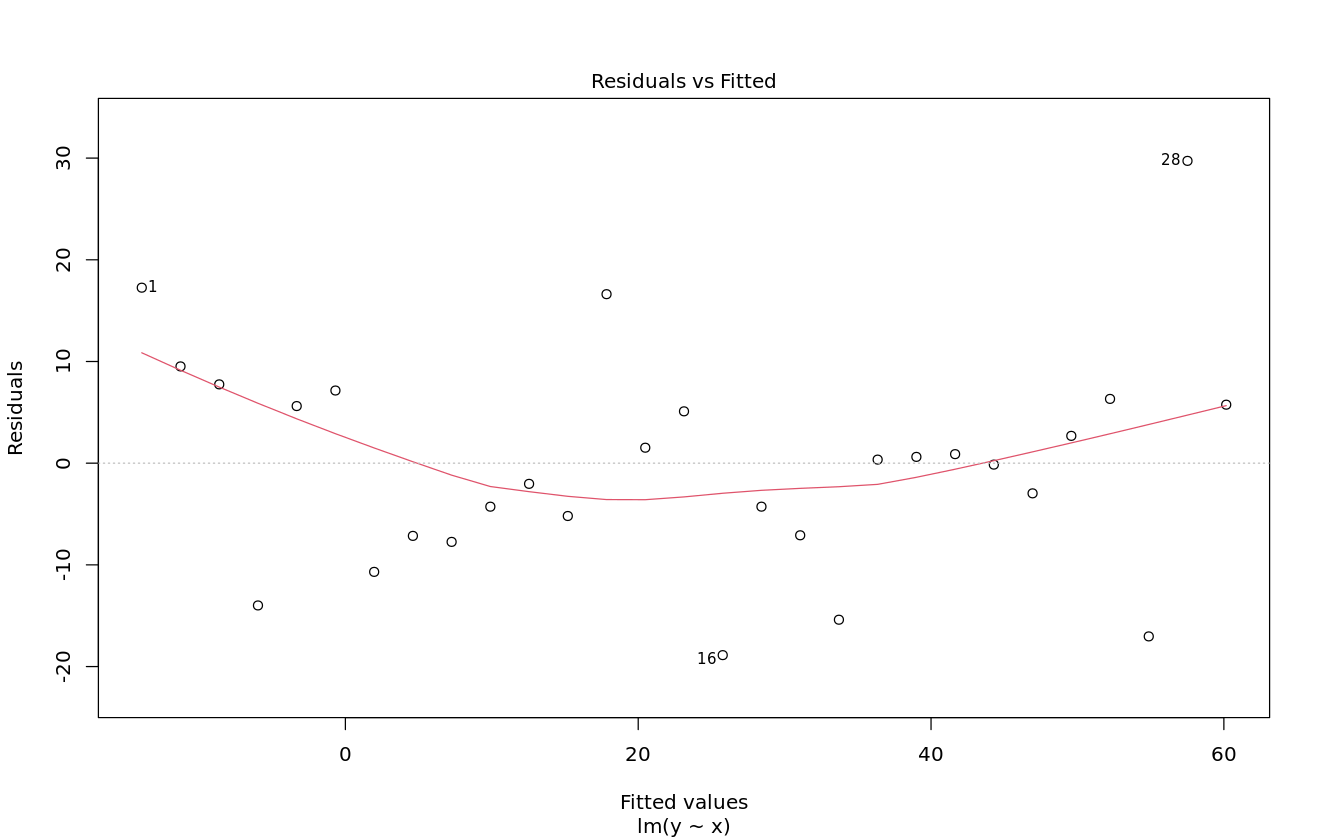

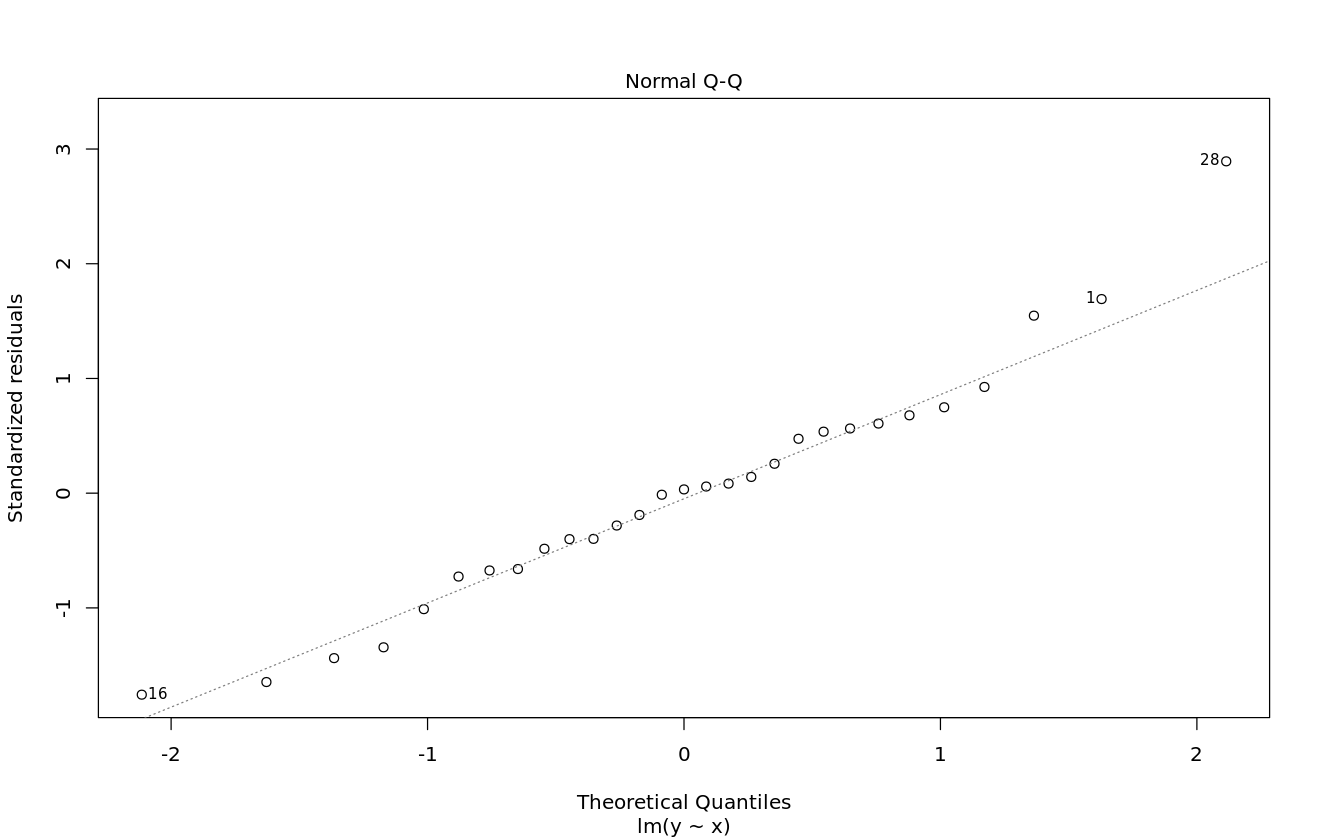

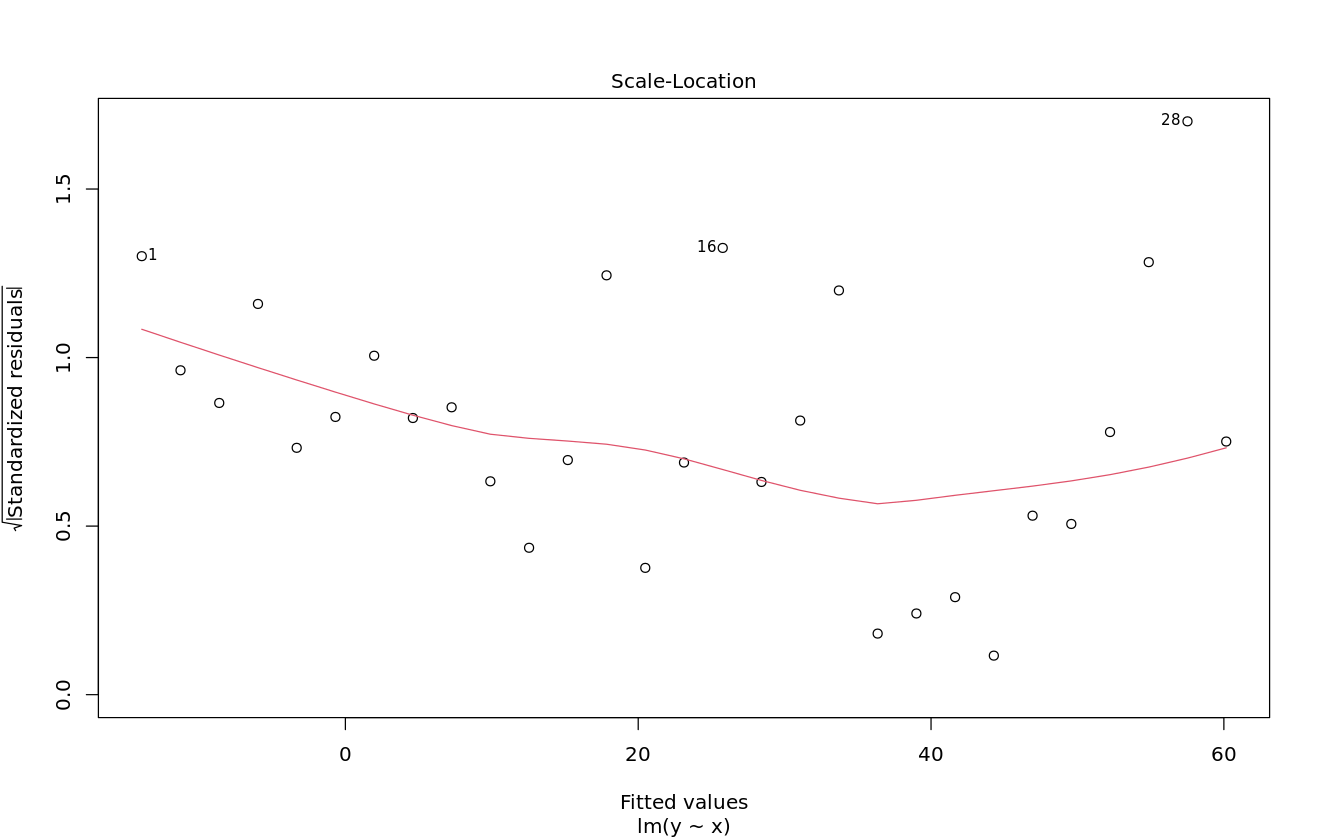

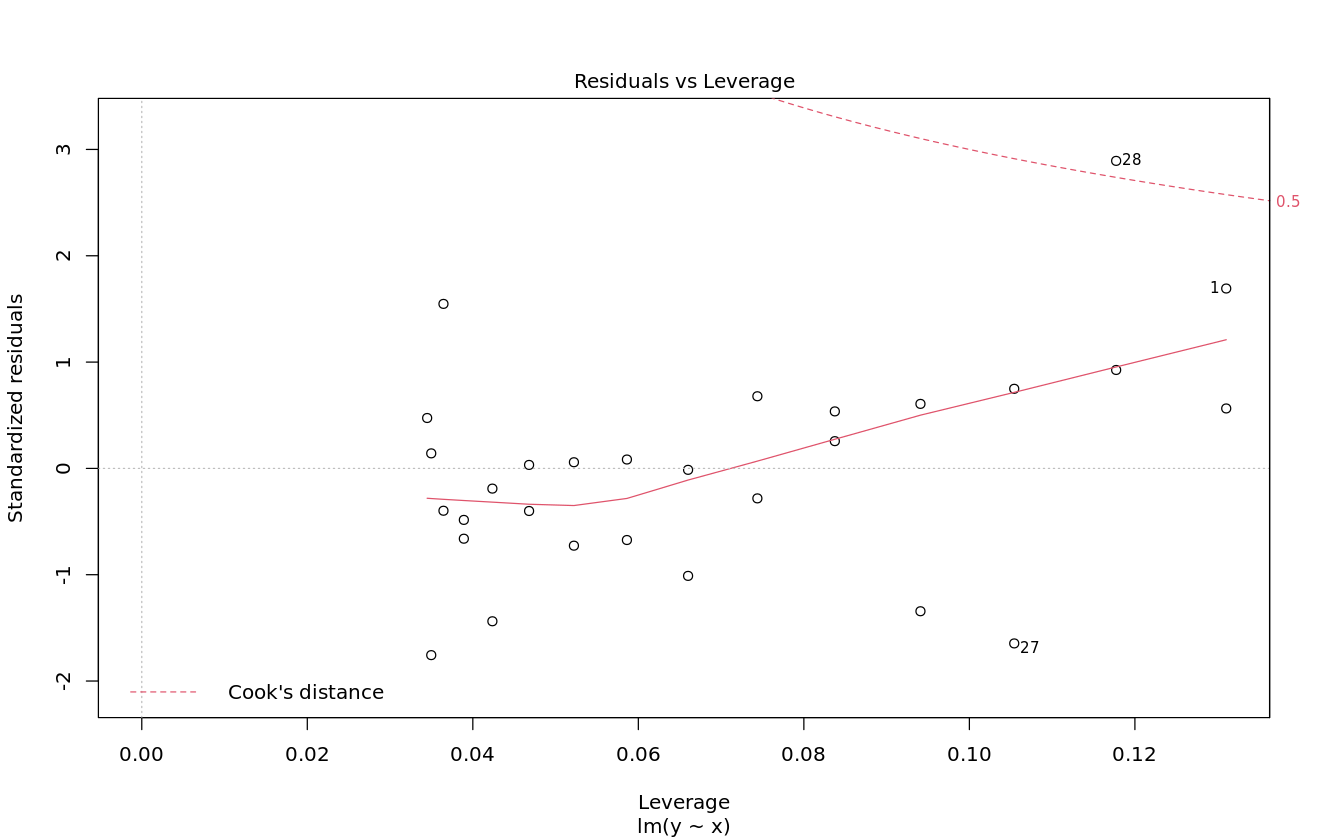

In [17]:
# base
plot(fit_lin)